## 전체 영양제 리뷰 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_all=pd.read_csv('../datasets/reviews_data/all_product.csv')
df_all

product_name review_date  \
0      브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...  2021.03.19   
1      브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...  2023.07.05   
2      브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...  2023.09.20   
3      브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...  2023.09.19   
4      브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...  2021.11.16   
...                                                  ...         ...   
90621              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.07.15   
90622              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.07.07   
90623              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.06.16   
90624              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.04.06   
90625              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.03.27   

                                          review_content  review_star  \
0      배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...          5.0   
1      유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...          5.0   
2      유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...          5.0   
3      유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\r\n약이 좀 커...          4.0   
4      배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n우선 약통 케이스도...          5.0   
...                                                  ...          ...   
90621  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...          2.0   
90622  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...          2.0   
90623                   배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요          5.0   
90624     배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데  좋아했어요          5.0   
90625                    배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요          5.0   

              review_writer  
0                      지오됴됴  
1                    ju82**  
2                    sns2**  
3                   gus1***  
4                gksd******  
...                     ...  
90621              rkdg****  
90622  macg****************  
90623              rkdg****  
90624                   채슨생  
90625               smcd***  

[90626 rows x 5 columns]

In [3]:
# df_all=df_all.drop(columns=['Unnamed: 0'])

### 불용어 처리 및 한글자 살리기 및 단어 치환, 

#### 전처리 필요한 파일들 가져오기

In [4]:
# 대체어
df_replace = pd.read_excel('../datasets/dic/replace_list.xlsx')
df_replace[:5]

before_replacement after_replacement
0                S헬스              삼성헬스
1                LG폰              스마트폰
2             LG V10              스마트폰
3                 G7              스마트폰
4                 GX              그룹운동

In [5]:
# 불용어 
df_stop = pd.read_excel('../datasets/dic/stopword_list.xlsx')
df_stop[:5]

stopword
0     가까스로
1       가량
2       가령
3       가민
4    가민커넥트

In [6]:
# 한글자 살리기
df_oneword=pd.read_excel('../datasets/dic/one_char_list.xlsx')
df_oneword[:5]

one_char_keyword
0                컵
1                방
2                물
3                돈
4                꿈

#### 전처리 시작 
- 1. 단어 치환 하기 
- 2. 불용어 처리 하기 
- 3. okt 이용해서 stemming 하기 _ 부사를 동사 원형으로 바꿔서 보기
<!-- mecab.pos로 토큰화하기 (.append(' '.join(token)) okt 하기  -->


In [7]:
## 단어 치환 함수 블로그 복사
def replace_word(review):
    for number in range(len(df_replace['before_replacement'])):
        try: 
            # 치환 단어만 데이터 치환
            if replace_list['before_replacement'][number] in review_content :
                review_content = review.replace(replace_list['before_replacement'][number], replace_list['after_replacement'][number])
        except: 
            pass
    return review
                

In [8]:
## 단어 치환 함수 블로그 복사
df_all['reveiw_replaced'] = ''
review_replaced_list = list()
for review in df_all['review_content']:
    review_replaced = replace_word(str(review))
    review_replaced_list.append(review_replaced)
df_all['reveiw_replaced'] = review_replaced_list
df_all[-10:]

product_name review_date  \
90616  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.09.23   
90617  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.03.03   
90618  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.02.27   
90619  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.02.27   
90620  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.08.09   
90621  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.07.15   
90622  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.07.07   
90623  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.06.16   
90624  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.04.06   
90625  푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복  2022.03.27   

                                          review_content  review_star  \
90616  배송 빨라요 성능 보통이에요 유통기한 보통이에요\n제품 섭취한지 얼마되지않아.좋은지...          3.0   
90617  배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n아침마다 일어나는게 힘...          5.0   
90618  배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n요즘 들어 기력이 떨어...          5.0   
90619  배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...          5.0   
90620                   배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요          5.0   
90621  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...          2.0   
90622  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...          2.0   
90623                   배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요          5.0   
90624     배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데  좋아했어요          5.0   
90625                    배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요          5.0   

               review_writer  \
90616             jong******   
90617               daph****   
90618  neti*****************   
90619            with*******   
90620                 jhi8**   
90621               rkdg****   
90622   macg****************   
90623               rkdg****   
90624                    채슨생   
90625                smcd***   

                                         reveiw_replaced  
90616  배송 빨라요 성능 보통이에요 유통기한 보통이에요\n제품 섭취한지 얼마되지않아.좋은지...  
90617  배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n아침마다 일어나는게 힘...  
90618  배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n요즘 들어 기력이 떨어...  
90619  배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...  
90620                   배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요  
90621  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...  
90622  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...  
90623                   배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요  
90624     배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데  좋아했어요  
90625                    배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요

In [9]:
# 내용의 토큰화 먼저_healthapp 복사
from mecab import MeCab
mecab = MeCab()
from konlpy.tag import Okt
okt = Okt()
stop=df_stop['stopword'].tolist()
oneword=df_oneword['one_char_keyword'].tolist()

In [10]:
# 불용어 제거 _ 블로그 및 chat
def stopword(text) :
    words = text.split() # text를 공백 기준으로 단어 분할한 뒤, 불용어 처리 진행 
    removed_words = [word for word in words if word not in stop]
    return ' '.join(removed_words)

In [11]:
## 불용어 처리 완료 
df_all['stopremoved_reviews']=df_all['reveiw_replaced'].apply(stopword)

In [12]:
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토큰화 결과를 담을 리스트 초기화
tokenized_reviews = []

# df_recovery['stopremoved_reviews'] 열의 각 텍스트에 대해 어구 추출 및 형태소 분석 수행
for review_text in df_all['stopremoved_reviews']:
    tokens = []
    try:
        # 어구 추출
        phrases = okt.phrases(review_text)
        
        # 추출된 어구에 대해 형태소 분석 및 원하는 품사(Noun, Verb, Adjective, Adverb, Exclamation, Determiner, Conjunction, Alpha) 선택
        for phrase in phrases:
            pos_result = okt.pos(phrase, norm=True, stem=True)
            for word, pos in pos_result:
                if pos in ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']:
                    if len(word) > 1 or word in oneword:
                        tokens.append(word)
    except:
        pass
    tokenized_reviews.append(' '.join(tokens))

In [13]:
# tokenized_reviews를 df_recovery에 새로운 열로 추가
df_all['okt_reviews'] = tokenized_reviews

In [14]:
df_all['okt_reviews'][21769]

'배송 성능 성능 성능 유통 기한 유통 기한 기한 유통 기한'

In [16]:
from collections import Counter

# 중복된 단어를 제거하는 함수 정의
def remove_duplicates(text):
    tokens = text.split()
    word_counts = Counter(tokens)
    unique_tokens = list(word_counts.keys())
    return ' '.join(unique_tokens)
# 중복된 단어를 제거한 결과를 새로운 열에 저장하고 기존 열을 덮어쓰려면 다음 코드를 사용할 수 있습니다.
df_all['okt_reviews'] = df_all['okt_reviews'].apply(remove_duplicates)

In [17]:
# df_recovery['replaced_review']=df_recovery['mecab_reviews']
df_all['replaced_review']=df_all['okt_reviews']

In [18]:
df_all.to_csv('../datasets/reviews_data/all_preprocess.csv')

In [23]:
# df_recovery['mecab_reviews']
df_all['replaced_review']

0        배송 성능 보통 유통 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제...
1        유통 기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문...
2        유통 기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 ...
3        유통 기한 포장 상태 보통 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문...
4        배송 성능 유통 기한 케이스 달라 확인 총알 알약 크기 작다 가로 길이 정도 이구 ...
                               ...                        
90621                       배송 성능 별로 유통 기한 박스 피로 회복 안되다 느낌
90622                          배송 성능 별로 유통 기한 보통 호불호 먹기 포기
90623                                          배송 성능 유통 기한
90624                                 배송 보통 성능 유통 기한 지인 선물
90625                                       배송 보통 성능 유통 기한
Name: replaced_review, Length: 90626, dtype: object

In [24]:
# review_star 부정과 긍정 댓글 분리 
condition_positive = df_all['review_star'] >= 3  # 긍정
condition_negative = df_all['review_star'] =< 3  # 부정

In [25]:
df_review_positive = df_all[condition_positive]
df_review_negative = df_all[condition_negative]

In [30]:
df_review_positive.to_csv('../datasets/reviews_data/all_preprocess_positive.csv')
df_review_negative.to_csv('../datasets/reviews_data/all_preprocess_negative.csv')

In [31]:
# 'mecab_reviews' 열의 모든 텍스트를 하나의 문자열로 결합
#combined_text = ' '.join(df_recovery['mecab_reviews'])
combined_text = ' '.join(df_all['okt_reviews'])

In [32]:
from wordcloud import WordCloud

In [33]:
from collections import Counter

#### 토큰화 리뷰 빈도 계산

###### 형태소의 빈도를 계산할때 

In [34]:
from collections import Counter

# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [35]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [36]:
wordcloud.words_

{'배송': 1.0,
 '기한': 0.9448264270871531,
 '유통': 0.9441694169416942,
 '성능': 0.7141853074196308,
 '보통': 0.3789573401784623,
 '가격': 0.289665077618873,
 '구매': 0.24653159760420487,
 '포장': 0.1966293851607383,
 '제품': 0.18801185674122967,
 '효과': 0.16379415719349713,
 '상태': 0.15653648698203154,
 '좋다': 0.12425131402029092,
 '복용': 0.12359430387483193,
 '오메가': 0.12353318665199853,
 '건강': 0.11778816770565946,
 '하다': 0.10328810658843662,
 '주문': 0.09641241901967974,
 '구입': 0.09007150715071507,
 '먹기': 0.07502139102799169,
 '비타민': 0.07456301185674123,
 '양제': 0.06732062095098398,
 '도움': 0.06305769465835473,
 '생각': 0.0611019435276861,
 '먹다': 0.06091859185918592,
 '루테': 0.05966568879110133,
 '섭취': 0.05653343112088987,
 '상품': 0.05359980442488693,
 '항상': 0.051124556900134455,
 '크기': 0.049061850629507395,
 '성분': 0.04644908935337978,
 '보고': 0.04550177239946217,
 '후기': 0.04411135558000245,
 '하루': 0.044080796968585745,
 '종근당': 0.04281261459479281,
 '알약': 0.04252230778633419,
 '추천': 0.040581835961373915,
 '넘김': 0.

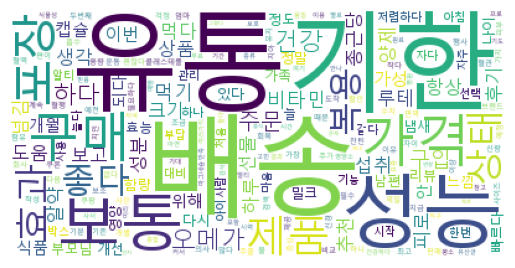

In [37]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

###### 문장을 합쳐서 계산할때 

In [38]:
text = ' '.join(df_all['okt_reviews'])
text

'배송 성능 보통 유통 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제조 과정 마음 구매 효과 알약 개봉시 주의 껍질 제거 습관 하나 얼른 양제 실선 가위 가요 유통 기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문 알약 크기 편입 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다 언제 연락 유통 기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 도움 문의사항 있다 언제 연락 유통 기한 포장 상태 보통 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다 언제 연락 배송 성능 유통 기한 케이스 달라 확인 총알 알약 크기 작다 가로 길이 정도 이구 리뷰 보고 구매 호주 영양 제로 원료 성분 달맞이꽃 자유 보라 양제 캐나다 산이 효과 가격 절반 사서 복용 배송 보통 성능 유통 기한 유통기간 나이라 폐경 생각 함유량 높다 제품 구매 캡슐 커서 물 모든 양제 복용 효과 배송 성능 보통 유통 기한 섭취 달맞이 자유 보라 다해 선택 건강하다 반응 배송 성능 유통 기한 제품 함량 효과 도움 갱년기 엄마 배송 보통 성능 유통 기한 두통 감마 리놀렌산 함유량 제조 과정 괜찮다 편이 복용 중이 개인 전화번호 연락 하다 치약 기도 번호 사은 틀다 자다 구매 유통 기한 포장 상태 보통 갱년기 감마 리놀렌산 성분 구매 효과 있딜 배송 성능 유통 기한 유효 기간 재다 보라 오일 먹다 생리 은색 통정 운동 병행 한몫 조금 변화 다시 구매 배송 유통 기한 구매 효과 벌써 보라 오일 안 먹다 사람 갱년기 아줌마 생리 양도 폐경기 손발 혈액 순환 온몸 하루 가격 부담 병원 가기 한가지 단점 반찬 손가락 멈추다 경우 좋다 가격 배송 보통 두번째 구매 효과 결론 갱년기 증상 최고 생리 다시 얼굴 트러블 먹고다 인생 배송 성능 유통 기한 정말 대안 마음 배송 성능 유통 기한 지인 소개 주문 기네 효과 도착 넘김 제품 함량 구매 복용 효과 리뷰 다시 보고 배란통 생리 불편 안건 배송 보통 성능 유통 기한

In [39]:
# 단어로 쪼개기 
text_split = text.split()

In [40]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'배송': 65448,
         '성능': 46742,
         '보통': 24802,
         '유통': 61794,
         '기한': 61837,
         '감마': 92,
         '리놀렌산': 80,
         '여성': 317,
         '다해': 382,
         '초록색': 38,
         '비교': 817,
         '브리': 113,
         '결정': 278,
         '함량': 1798,
         '제조': 288,
         '과정': 166,
         '마음': 1377,
         '구매': 16135,
         '효과': 10720,
         '알약': 2783,
         '개봉시': 12,
         '주의': 219,
         '껍질': 40,
         '제거': 146,
         '습관': 341,
         '하나': 1313,
         '얼른': 131,
         '양제': 4406,
         '실선': 1,
         '가위': 17,
         '가요': 81,
         '포장': 12869,
         '상태': 10245,
         '두번째': 819,
         '구입': 5895,
         '월경': 34,
         '증후군': 170,
         '프로': 623,
         '정도': 1958,
         '영향': 220,
         '다시': 1978,
         '한번': 1314,
         '주문': 6310,
         '크기': 3211,
         '편입': 219,
         '판매': 1022,
         '답글': 226,
         '고객': 213,
         '제품':

In [41]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(text)

In [42]:
# count 
wordCloud.words_ 

{'유통 기한': 1.0,
 '성능 유통': 0.6642598109053232,
 '배송 성능': 0.6193660147649268,
 '기한 배송': 0.25560160600958426,
 '배송 보통': 0.22942300220178732,
 '가격 배송': 0.1692462116306178,
 '포장 상태': 0.15493459396451237,
 '보통 유통': 0.13879355005828262,
 '기한 포장': 0.13736886413676985,
 '보통 성능': 0.12729892500971376,
 '성능 보통': 0.08552972412899884,
 '배송 가격': 0.054688511850796526,
 '기한 보통': 0.050964900919570004,
 '구매 배송': 0.050155420282346846,
 '상태 유통': 0.04225488926304883,
 '배송 유통': 0.04026356689547986,
 '보통 가격': 0.03441911669472866,
 '효과 배송': 0.033561067219272114,
 '상태 보통': 0.03315632690066054,
 '생각': 0.02977269783706774,
 '양제': 0.028380391141043907,
 '섭취': 0.027894702758710012,
 '정말': 0.02460821137158399,
 '기한 오메가': 0.023814920347105296,
 '제품 배송': 0.02137028882269136,
 '효과': 0.02090079005310193,
 '비타민': 0.0207388939256573,
 '하루': 0.02009130941587877,
 '성분': 0.01978370677373397,
 '보통 포장': 0.01905517420023313,
 '구입': 0.01899041574925528,
 '주문 배송': 0.018828519621810647,
 '기한 항상': 0.018423779303199068,
 '피로': 0.0184

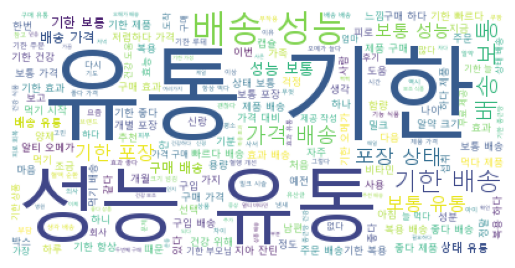

In [43]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

In [44]:
df_negative=pd.read_csv('../datasets/reviews_data/all_preprocess_negative.csv')
df_negative

Unnamed: 0                                       product_name  \
0           249  브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...   
1           339  브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...   
2           389  브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...   
3           395  브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...   
4           477  브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...   
..          ...                                                ...   
704       90439                            [에스더포뮬러] 피로날린 멀티비타민 1박스   
705       90561    르시크릿 김희애 에스트로업 3박스(3개월분)선물세트 여성 갱년기케어 면역력 피로 개선   
706       90573          뉴트리원 정우성 피로개선 홍경천 밀크씨슬 2박스(2개월분) 실리마린 간건강   
707       90621              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복   
708       90622              푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복   

    review_date                                     review_content  \
0    2021.01.06  배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요\r\n감마리놀렌산 효능이야...   
1    2021.06.22  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\r\n효과는 전혀없는듯\...   
2    2016.12.01  가격 괜찮네요 배송 보통이에요\r\n브리오 캐나다 감마리놀렌산 보라지오일 달맞이꽃 ...   
3    2016.01.11  좋아지는지 모르겠어요 좋아지는지 모르겠어요..ㅜㅜ 열심히 먹거든요 부작용안나는걸 다...   
4    2022.08.12                                        성능 성능이 뛰어나요   
..          ...                                                ...   
704  2018.10.17           배송 보통이에요 맛 맛이 아쉬워요 유통기한 보통이에요 효과 효과 별로예요   
705  2021.12.12  배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요\n먹은지는 얼마안되만 효과...   
706  2021.11.04  배송 빨라요 유통기한 기한이 짧아요\n아직 효과는 모르겠고 유통기한이 짧아요 ㅠㅠ\...   
707  2022.07.15  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...   
708  2022.07.07  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...   

     review_star               review_writer  \
0            1.0                     sbc5***   
1            2.0                     jjl5***   
2            2.0                  qjsr******   
3            2.0                        아푸지마   
4            2.0         1991***************   
..           ...                         ...   
704          2.0                      skts**   
705          2.0  misu**********************   
706          2.0                     알록달록무지개   
707          2.0                    rkdg****   
708          2.0        macg****************   

                                       reveiw_replaced  \
0    배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요\r\n감마리놀렌산 효능이야...   
1    배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\r\n효과는 전혀없는듯\...   
2    가격 괜찮네요 배송 보통이에요\r\n브리오 캐나다 감마리놀렌산 보라지오일 달맞이꽃 ...   
3    좋아지는지 모르겠어요 좋아지는지 모르겠어요..ㅜㅜ 열심히 먹거든요 부작용안나는걸 다...   
4                                          성능 성능이 뛰어나요   
..                                                 ...   
704           배송 보통이에요 맛 맛이 아쉬워요 유통기한 보통이에요 효과 효과 별로예요   
705  배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요\n먹은지는 얼마안되만 효과...   
706  배송 빨라요 유통기한 기한이 짧아요\n아직 효과는 모르겠고 유통기한이 짧아요 ㅠㅠ\...   
707  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...   
708  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...   

                                   stopremoved_reviews  \
0    배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요 감마리놀렌산 효능이야 어떤...   
1    배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요 효과는 전혀없는듯 먹던거...   
2    가격 괜찮네요 배송 보통이에요 브리오 캐나다 감마리놀렌산 보라지오일 달맞이꽃 종자유...   
3    좋아지는지 모르겠어요 좋아지는지 모르겠어요..ㅜㅜ 먹거든요 부작용안나는걸 다행으로 ...   
4                                          성능 성능이 뛰어나요   
..                                                 ...   
704                 배송 보통이에요 맛 맛이 아쉬워요 유통기한 보통이에요 별로예요   
705  배송 보통이에요 성능 성능이 별로예요 유통기한 보통이에요 먹은지는 얼마안되만 효과는...   
706       배송 빨라요 유통기한 기한이 짧아요 아직 효과는 모르겠고 유통기한이 짧아요 ㅠㅠ   
707  배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요 2박스 먹어봤으나 피로회...   
708  배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요 호불호가 있을지 모르겠지만 저...   

                                           okt_reviews  \
0    배송 보통 성능 별로 유통 기한 감마 리놀렌산 효능 어떻다 제약회사 제품 여성 갱년...   
1                                 배송 성능 별로 유통 기한 효과 전혀   
2                가격 배송 보통 브리 캐나다 감마 리놀렌산 보라 오일 달맞이꽃 자유   
3                                  부작용 안나 는걸 다행 야하다 가요   
4                                                   성능   
..  

### 벡터화 진행